# Preparation

In [ ]:
# Import module
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data collection
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

# Data Visualization

## Comparison

Bar Chart & Line Chart

In [ ]:
df_class_age = df[['class', 'age']]
df_class_age.head(3)

,class,age
0,Third,22.0
1,First,38.0
2,Third,26.0


In [ ]:
# Mencari rata-rata usia tiap kelas
df_ca = df_class_age.groupby('class')['age'].mean().reset_index()
df_ca

,class,age
0,First,38.233441
1,Second,29.877630
2,Third,25.140620


In [ ]:
# tanpa reset_index()
df_class_age.groupby('class')['age'].mean()

In [ ]:
# Mengganti nama kolom usia
df_ca = df_ca.rename(columns ={
    'age' : 'avg_age'
})
df_ca.head()

,class,avg_age
0,First,38.233441
1,Second,29.877630
2,Third,25.140620


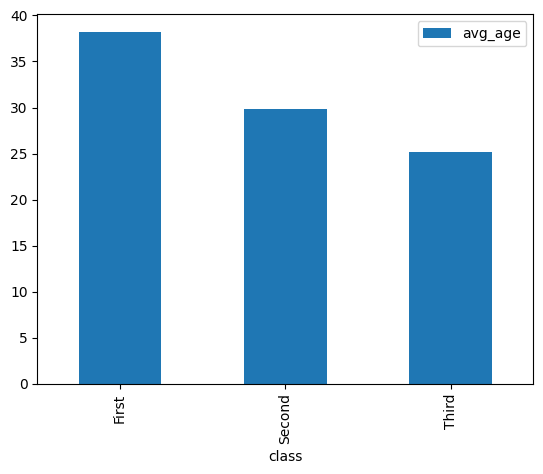

In [ ]:
# Plot Pandas Vertical Barchart
df_ca.plot(x='class', y='avg_age', kind='bar')
plt.show()

<Axes: xlabel='class'>

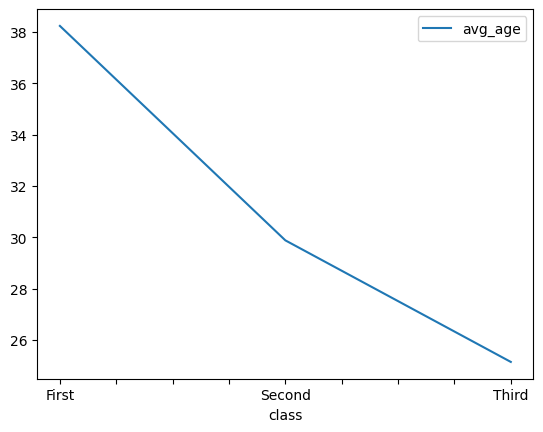

In [ ]:
df_ca.plot(x='class', y='avg_age')

<Axes: ylabel='class'>

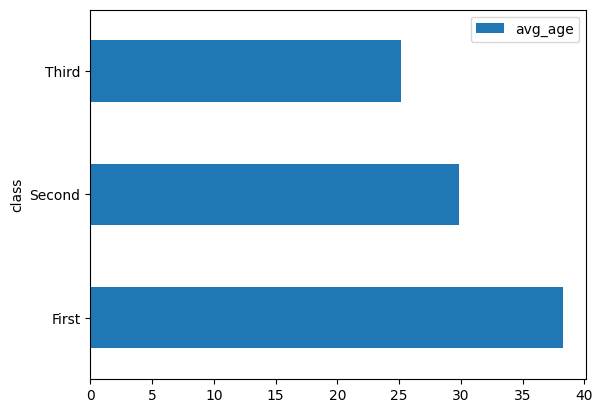

In [ ]:
# Plot Pandas Horizontal Barchart
df_ca.plot(x='class', y='avg_age', kind='barh')

<Axes: ylabel='class'>

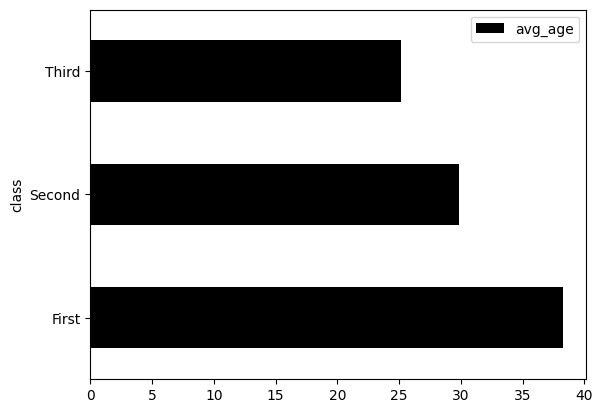

In [ ]:
# Plot Pandas Horizontal Barchart
df_ca.plot(x='class',
           y='avg_age',
           kind='barh',
           color='black'
           )

<BarContainer object of 3 artists>

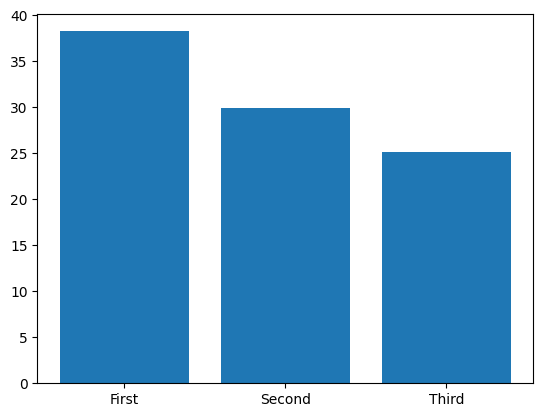

In [ ]:
# Matplotlib

plt.bar(data=df_ca,
        x='class',
        height='avg_age')

<Axes: xlabel='class', ylabel='avg_age'>

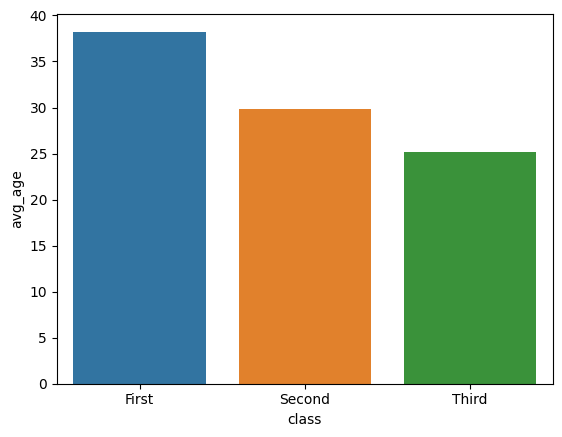

In [ ]:
# Seaborn
sns.barplot(
    data=df_ca,
    x='class',
    y='avg_age'
)

Rata-rata usia tertinggi, terdapat di First Class dengan rata-rata usia 38. Second Class rata-rata usianya 29.
Third ....

### Mengkategorikan data per 10 tahun

In [ ]:
#Izin bertanya tuan, bagaimana jika kita mendapati suatu data yang mana kita ingin membandingkan hasil pengeluaran tiap tahun, yang mana tahunnya itu dari 1900 - 2000, tetapi kita hanya ingin menampilkan berdasarkan range 10 tahun

df_abdhi = pd.DataFrame({
    'year'    : [1900, 1902, 1910, 1911, 1923],
    'value'  : [1, 2, 3, 4, 4]
})

df_abdhi

,year,value
0,1900,1
1,1902,2
2,1910,3
3,1911,4
4,1923,4


In [ ]:
df_abdhi['year10tahun'] = df_abdhi['year'] // 10 #Floor 10 tahunan
df_abdhi

,year,value,year10tahun
0,1900,1,190
1,1902,2,190
2,1910,3,191
3,1911,4,191
4,1923,4,192


In [ ]:
df_abdhi['year10tahun'] = (df_abdhi['year'] // 10)* 10 #Floor 10 tahunan dikali 10
df_abdhi

,year,value,year10tahun
0,1900,1,1900
1,1902,2,1900
2,1910,3,1910
3,1911,4,1910
4,1923,4,1920


### Mengapa pada data Titanic Class First masih muncul?

In [ ]:
df_non_first = df_ca[df_ca['class'] != 'First']
df_non_first

,class,avg_age
1,Second,29.87763
2,Third,25.14062


In [ ]:
df_non_first['class'].unique()

['Second', 'Third']
Categories (3, object): ['First', 'Second', 'Third']

In [ ]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

<ipython-input-28-a75f752c194c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_first['class'] = df_non_first['class'].astype('object') #cara kedua: mengubah tipe data menjadi object


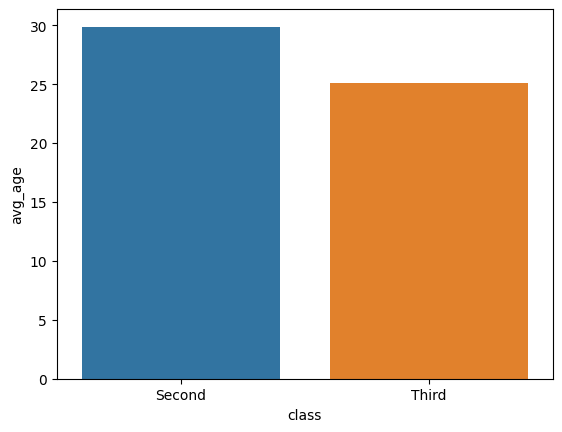

In [ ]:
# Next Session
df_non_first = df_ca[df_ca['class']!='First']

#df_non_first['class'] = df_non_first['class'].cat.remove_categories(['First']) #cara pertama: remove categories
df_non_first['class'] = df_non_first['class'].astype('object') #cara kedua: mengubah tipe data menjadi object


sns.barplot(data=df_non_first, x='class', y='avg_age')
plt.show()

<Axes: xlabel='class', ylabel='age'>

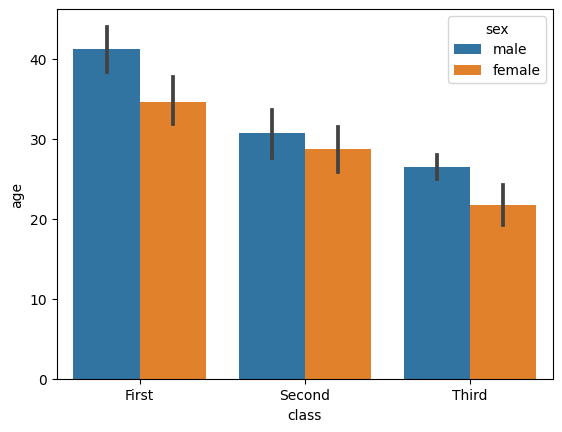

In [ ]:
#Multibarplot

sns.barplot(
    data=df,
    x='class',
    y='age',
    hue='sex'
)

Male lebih banyak dari Female di setiap Class

## Distribution

Histogram, boxplot, scatterplot

<Axes: ylabel='Frequency'>

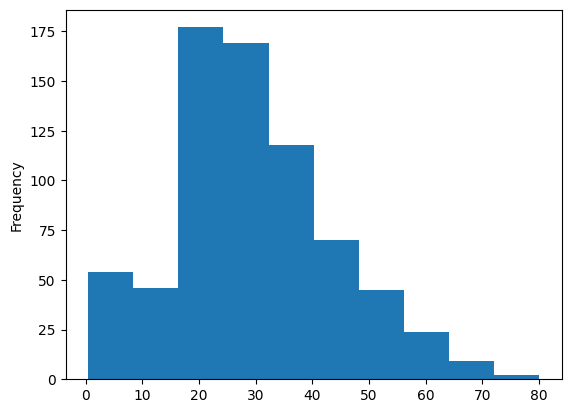

In [ ]:
#Histogram
# pandas
df['age'].plot(kind='hist')

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

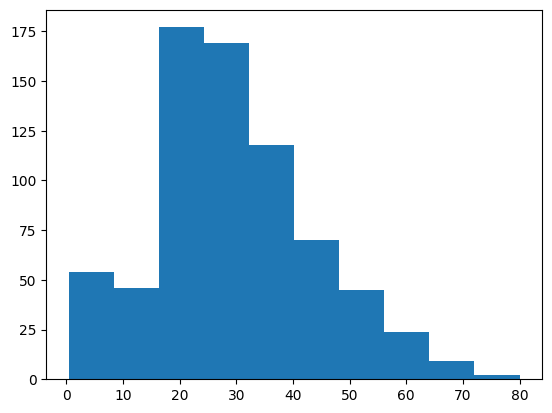

In [ ]:
# matplotlib
plt.hist(data=df, x='age')

<Axes: xlabel='age', ylabel='Count'>

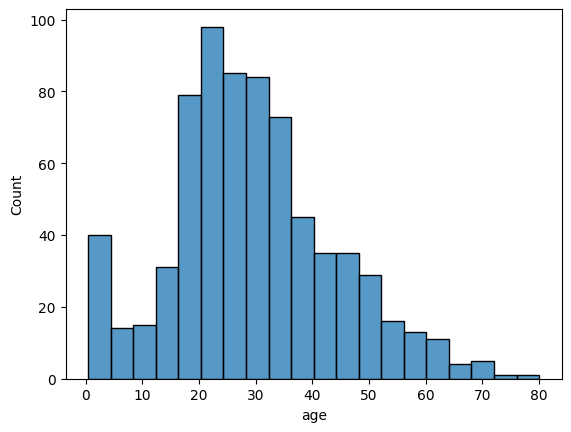

In [ ]:
# searborn
sns.histplot(data=df, x='age')

Ditemukan bahwa penumpang terbanyak adalah yang berusia sekitar 20 - 30 tahun.

Ditemukan bahwa penumpang berusia di bawah 10 tahun ada sebanyak lebih dari 40 anak.

<Axes: xlabel='age', ylabel='Density'>

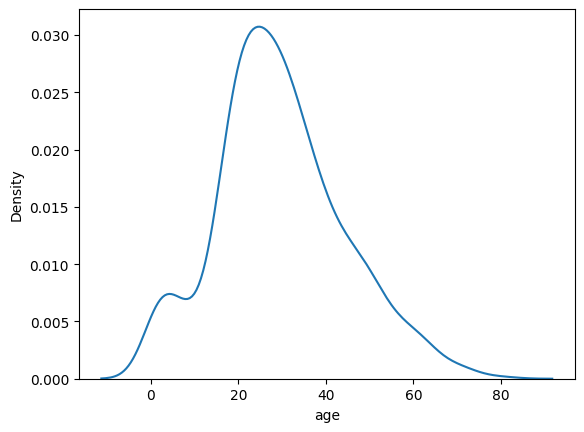

In [ ]:
sns.kdeplot(data=df, x='age')

In [ ]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

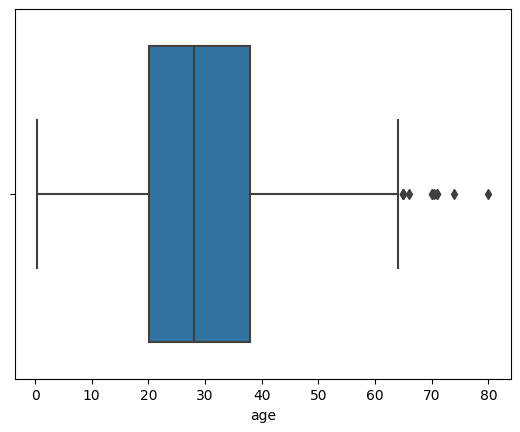

In [ ]:
# Boxplot

sns.boxplot(data=df, x='age')

<Axes: xlabel='age', ylabel='class'>

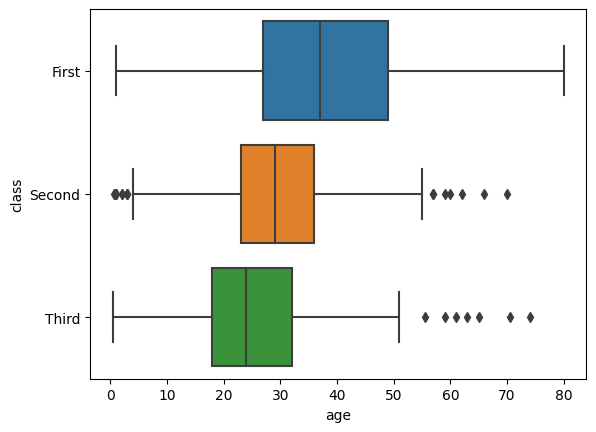

In [ ]:
sns.boxplot(data=df, x='age', y='class')

Dari data usia pengunjung seluruhnya, rata-rata usia adalah 29.

Terdapat x outlier yang usianya lebih dari (Q3 + 1.5IQR)

## Relationship

Scatterplot, Heatmap

<Axes: xlabel='age', ylabel='fare'>

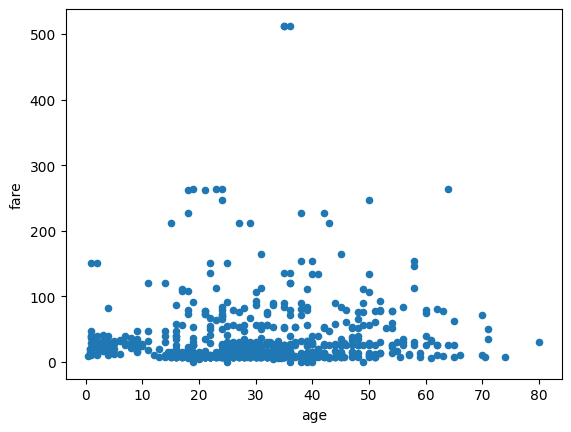

In [ ]:
#pandas
df.plot(x = 'age',
        y = 'fare',
        kind='scatter')

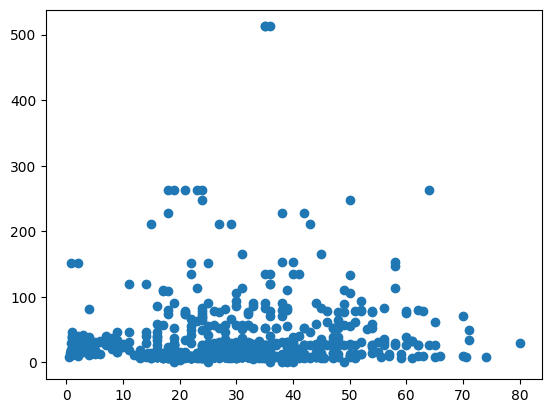

In [ ]:
#matplotlib
plt.scatter(
    data=df,
    x='age',
    y='fare'
)

<Axes: xlabel='age', ylabel='fare'>

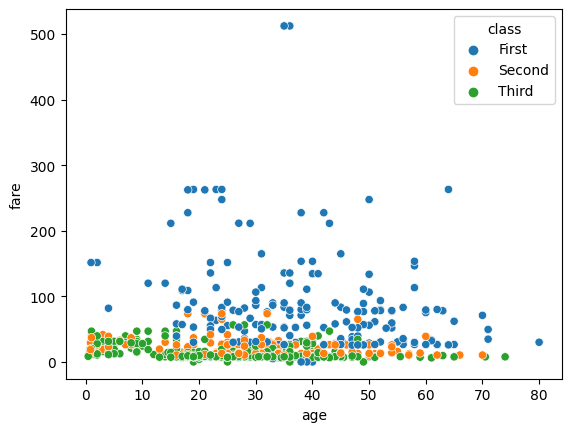

In [ ]:
#seaborn
sns.scatterplot(
    data=df,
    x='age',
    y='fare',
    hue='class'
)

Tuan mau bertanya, jika ingin melakukan scat plot tetapi untuk value tertentu saja?

semisal kita hanya ingin membuat scat plot hanya class 1 dan age leibih dari 40 tahun

In [ ]:
filter_class = df['class']=='First'
filter_age = df['age'] > 40

df_class1_age40 = df[(filter_class) & (filter_age)]

#df_class1_age40 = df[(df['class']=='First') & (df['age'] > 40)]
df_class1_age40.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
35,0,1,male,42.0,1,0,52.0000,S,First,man,True,NaN,Southampton,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False


<Axes: xlabel='age', ylabel='fare'>

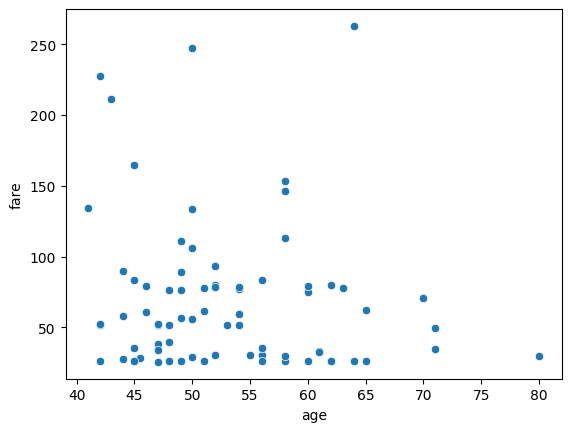

In [ ]:
sns.scatterplot(
    data=df_class1_age40,
    x='age',
    y='fare'
)

## Composition

Pie chart, Donut chart, Treemap, Stacked Bar Chart

In [ ]:
df[df['class']=='Third'].count()

survived       491
pclass         491
sex            491
age            355
sibsp          491
parch          491
fare           491
embarked       491
class          491
who            491
adult_male     491
deck            12
embark_town    491
alive          491
alone          491
dtype: int64

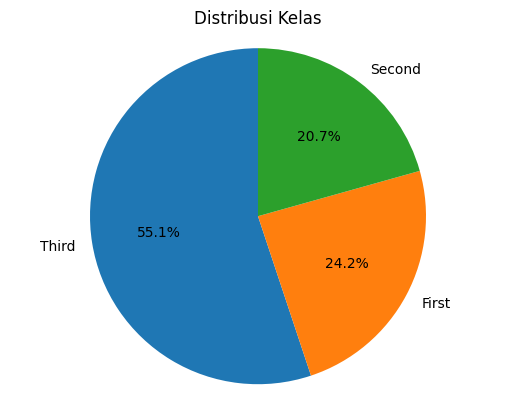

In [ ]:
# Menghitung frekuensi dari setiap kelas
class_counts = df['class'].value_counts()

# Membuat pie chart
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribusi Kelas')
plt.show()

## Save Plot

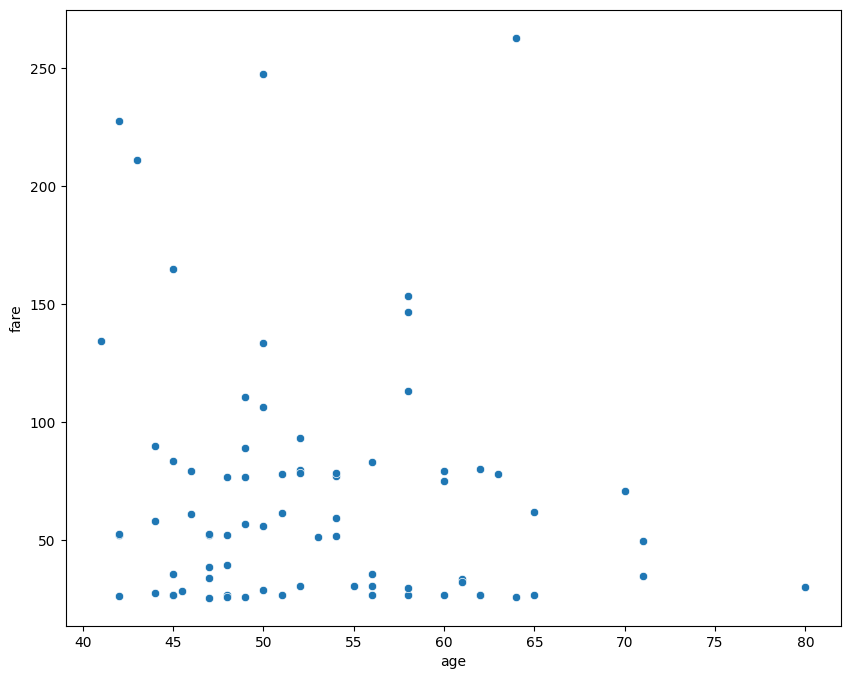

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    data=df_class1_age40,
    x='age',
    y='fare'
)

# cara untuk save plot
plt.savefig('firstplot.png')

In [ ]:
Kenapa kita butuh tight_layout()? http://omz-software.com/pythonista/matplotlib/users/tight_layout_guide.html#:~:text=tight_layout%20automatically%20adjusts%20subplot%20params,%2C%20axis%20labels%2C%20and%20titles.

# Customize Plot

In [ ]:
Plot beberapa axes
Mengubah warna
Mengubah title
Mengubah label x dan y axis
Menggunakan x dan y limit
Mengatur legenda
Menambahkan teks dan anotasi

plt.figure(figsize=(10,8))

In [ ]:
# set columns we will be used
age = df['age']
fare = df['fare']
kelas = df['class']

In [ ]:
coba = pd.read_csv('https://raw.githubusercontent.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/master/datasets/number-of-natural-disaster-events.csv')
coba.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [1]:
# Data collection
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<ipython-input-5-7452d86f8334>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

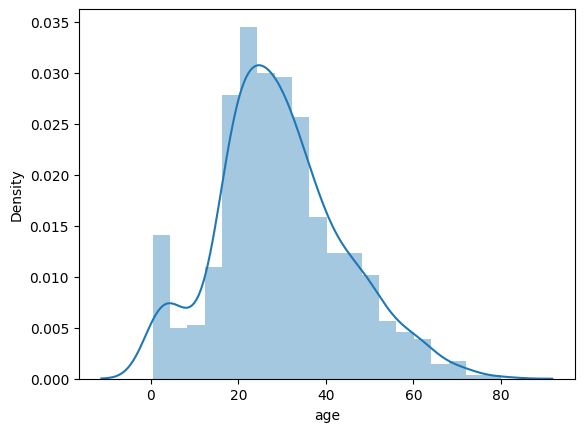

In [5]:
sns.distplot(df['age'])